# Import

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import string
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix



[nltk_data] Downloading package stopwords to
[nltk_data]     \\cubitus\gbouaziz\Windows\Application
[nltk_data]     Data\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
 '''
    # Downlaod the Dataset
!wget --no-check-certificate https://files.consumerfinance.gov/ccdb/complaints.csv.zip #download-the-data
#data = pd.read_csv('small_complaints.csv', engine='python', encoding='utf-8', error_bad_lines=False, sep=',')
'''

"\n   # Downlaod the Dataset\n!wget --no-check-certificate https://files.consumerfinance.gov/ccdb/complaints.csv.zip #download-the-data\n#data = pd.read_csv('small_complaints.csv', engine='python', encoding='utf-8', error_bad_lines=False, sep=',')\n"

In [4]:
'''
from zipfile import ZipFile
with ZipFile('complaints.csv.zip', 'r') as zipObj:

   # Extract all the contents of zip file in different directory
   zipObj.extractall('')
'''

"\nfrom zipfile import ZipFile\nwith ZipFile('complaints.csv.zip', 'r') as zipObj:\n\n   # Extract all the contents of zip file in different directory\n   zipObj.extractall('')\n"

# Data 

In [5]:
data = pd.read_csv('complaints.csv', engine='python', encoding='utf-8', error_bad_lines=False, sep=',')

In [6]:
data = data[["Product","Consumer complaint narrative"]]

In [7]:
data.head()

,Product,Consumer complaint narrative
0,Debt collection,To Whom It May Concern : I recently received a...
1,Credit card or prepaid card,NaN
2,"Payday loan, title loan, or personal loan","Hello, on my credit report you have XXXX XXXX ..."
3,"Credit reporting, credit repair services, or o...",NaN
4,"Credit reporting, credit repair services, or o...",NaN


In [8]:
data.isnull().sum()

Product                               0
Consumer complaint narrative    1935994
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
text = data['Consumer complaint narrative'].tolist()

In [11]:
data.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    494504
Debt collection                                                                 189607
Mortgage                                                                         96843
Credit card or prepaid card                                                      79858
Checking or savings account                                                      52621
Student loan                                                                     32166
Credit reporting                                                                 31588
Money transfer, virtual currency, or money service                               25862
Vehicle loan or lease                                                            19439
Credit card                                                                      18838
Bank account or service                                                          14885
Payday loan, title loan, or personal loan  

<AxesSubplot:>

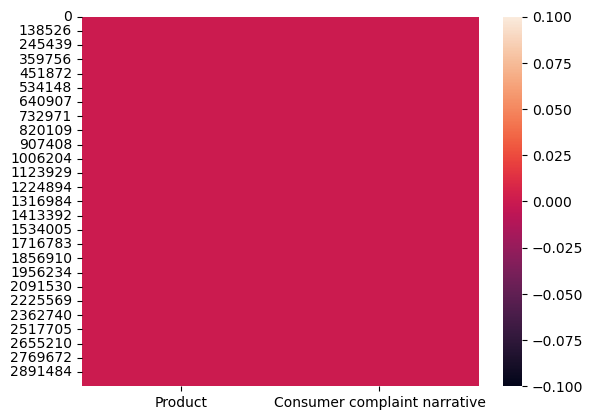

In [12]:
sns.heatmap(data.isnull())

# Preprocessing & Vizz

In [13]:
# We will group some product types 
data.loc[data['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
data.loc[data['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
data.loc[data['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
data.loc[data['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'


In [14]:
# In the code below you should add : Prepaid card, Consumer Loan & Bank account or service to "Other financial service"
data.loc[data['Product'] == 'Prepaid card', 'Product'] = 'Other financial service'
data.loc[data['Product'] == 'Consumer Loan', 'Product'] = 'Other financial service'
data.loc[data['Product'] == 'Bank account or service', 'Product'] = 'Other financial service'
# CODE HERE

# We will not consider other financial service
# Code Here
data = data[data.Product != None]


In [15]:
data = data.reset_index(drop=True)

In [16]:
data

,Product,Consumer complaint narrative
0,Debt collection,To Whom It May Concern : I recently received a...
1,"Payday loan, title loan, or personal loan","Hello, on my credit report you have XXXX XXXX ..."
2,Credit card or prepaid card,My complaint is with CaptialOne Saks Fifth Ave...
3,"Credit reporting, credit repair services, or o...",I value your help to REMOVED a portion of the ...
4,"Credit reporting, credit repair services, or o...","On Friday, XX/XX/XXXX I wrote a letter to XXXX..."
...,...,...
1083947,Credit card or prepaid card,"Automated calls from "" XXXX with Capital One '..."
1083948,Debt collection,I have disputed my debts several times with no...
1083949,Mortgage,My father died in XX/XX/XXXX. Left me his only...
1083950,"Credit reporting, credit repair services, or o...",cfbp i would Like to file a complaint on Exper...


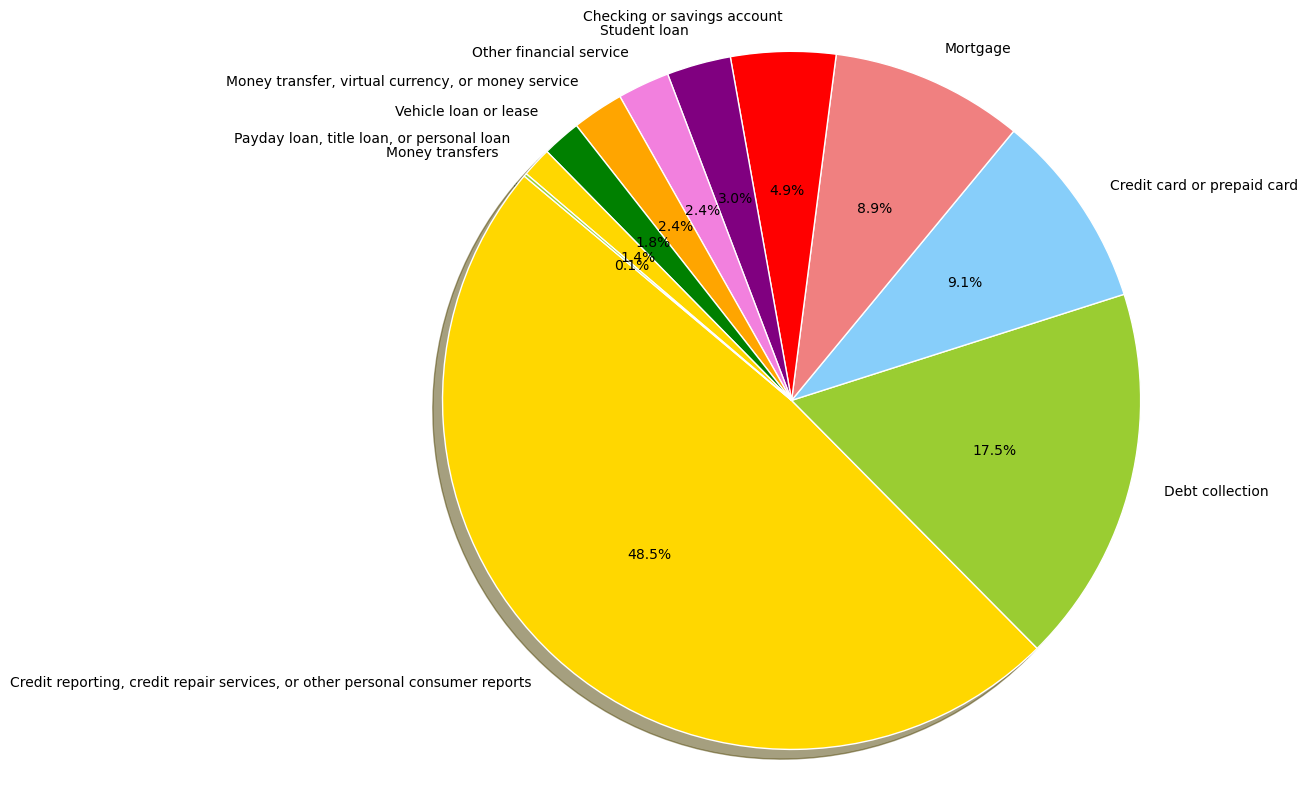

In [17]:
# Data to plot
labels = list(data.Product.value_counts().index)
sizes = list(data.Product.value_counts().values)
colors = ['gold','yellowgreen', 'lightskyblue', 'lightcoral', 'red', 'purple', '#f280de', 'orange', 'green']
#explode = (0.1, 0, 0, 0,0,0,0,0,0)  # explode 1st slice

# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops={"edgecolor":"white"})
plt.axis('equal')
plt.show()

In [18]:
def complaint_product(indx,data):
  complaint = data['Consumer complaint narrative'][indx]
  product = data['Product'][indx]
  print(complaint)
  print('------------------------------')
  print("Product : ",product)

In [19]:
complaint_product(238, data)

I received a phone call from XXXX and he said that he was with Chase Fraud department and they were calling regarding a potential fraud charge on my account. He said it was for {$2200.00} from XXXX and it was being charged from NC. He told me the last four of my credit card account. I couldn't remember having a Chase card, so I went to login and I saw the account was closed and the last payment was XX/XX/XXXX. The scary part is he told me the exact amount of my last payment. He asked me if I had possession of my card and asked if I was the only authorized user. I told him I had to call my husband. He told me to call him back directly at XXXX extension XXXX, I thought he said his name was XXXX XXXX but it was garbled. I called Chase directly and confirmed my account was closed and they told me that is how scammers work and they would never call me from a local number. Chase told me to block the number and do not give the guy any more information. A few minutes after I hung up I got a ca

In [20]:
'''Make text lowercase, remove text in square brackets, remove punctuation, remove words containing numbers, remove stop words and Xs.'''
def clean_text(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('\n', '', text)
  text = text.replace('x', '')
  text = ' '.join(word for word in text.split() if word not in STOPWORDS)
  return text

In [21]:
# Code Here
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].apply(lambda x: clean_text(x))  # apply clean_text function 

In [22]:
data

,Product,Consumer complaint narrative
0,Debt collection,may concern recently received copy credit repo...
1,"Payday loan, title loan, or personal loan",hello credit report reporting account open acc...
2,Credit card or prepaid card,complaint captialone saks fifth ave first noti...
3,"Credit reporting, credit repair services, or o...",value help removed portion data credit file ca...
4,"Credit reporting, credit repair services, or o...",friday wrote letter transunion three credit bu...
...,...,...
1083947,Credit card or prepaid card,automated calls capital one calls home phone e...
1083948,Debt collection,disputed debts several times resolution submit...
1083949,Mortgage,father died left son belongings also single mo...
1083950,"Credit reporting, credit repair services, or o...",cfbp would like file complaint eperian reporti...


In [23]:
# After cleaning
complaint_product(238, data)

received phone call said chase fraud department calling regarding potential fraud charge account said charged nc told last four credit card account couldnt remember chase card went login saw account closed last payment scary part told eact amount last payment asked possession card asked authorized user told call husband told call back directly etension thought said name garbled called chase directly confirmed account closed told scammers work would never call local number chase told block number give guy information minutes hung got call guy asked spoke husband hung blocked called answered heard voice hung blocked happened today first call minutes long
------------------------------
Product :  Credit card or prepaid card


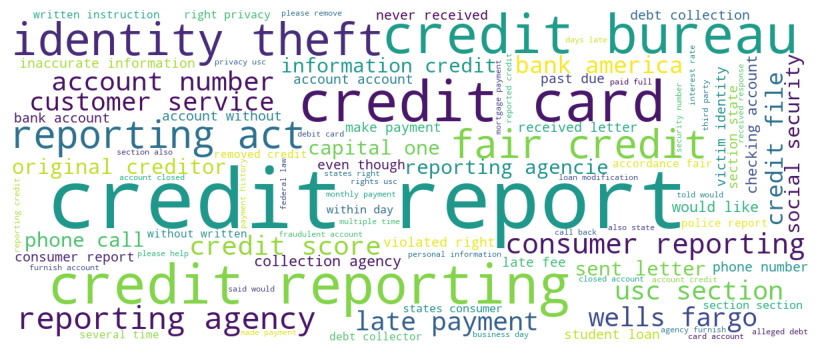

In [24]:
text = " ".join(complaint for complaint in data["Consumer complaint narrative"])
# Generate a word cloud image

wordcloud = WordCloud(width = 1200, height = 500, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [25]:
number_words = [len(complaints.split(' ')) for complaints in data["Consumer complaint narrative"]]

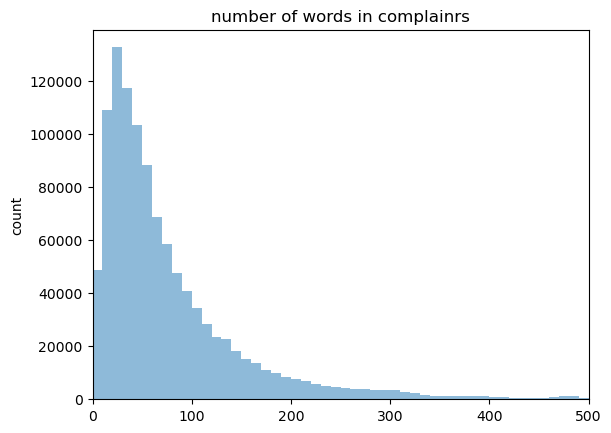

In [26]:
# fixed bin size
bins = np.arange(-0, 3000, 10) # fixed bin size

plt.xlim([0, 500])

plt.hist(number_words, bins=bins, alpha=0.5)
plt.title('number of words in complainrs')
plt.ylabel('count')

plt.show()

<AxesSubplot:>

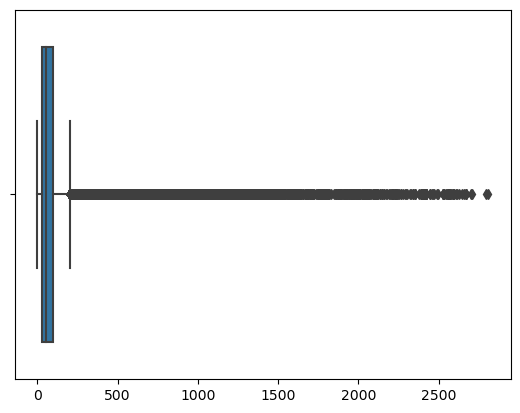

In [27]:
sns.boxplot(number_words)

# Multi-Class Text Classification LSTM 

In [28]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(data['Consumer complaint narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 267696 unique tokens.


In [29]:
X = tokenizer.texts_to_sequences(data['Consumer complaint narrative'].values)#list of integers
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH) #padding
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1083952, 250)


In [30]:
labels = list(pd.get_dummies(data['Product']).columns)
Y = pd.get_dummies(data['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1083952, 11)


In [32]:
# Code Here
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.2)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(867161, 250) (867161, 11)
(216791, 250) (216791, 11)


**Expected Output :**
(35449, 250) (35449, 9)
(8863, 250) (8863, 9)

In [33]:
# Code Here
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(11, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 11)                1111      
                                                                 
Total params: 5,081,511
Trainable params: 5,081,511
Non-trainable params: 0
_________________________________________________________________
None


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param   
_________________________________________________________________
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 909    
_________________________________________________________________

Total params: 5,081,309
Trainable params: 5,081,309
Non-trainable params: 0


In [34]:
epochs = 5
batch_size = 3900
# Code Here
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
201/201 [==============================] - 2122s 11s/step - loss: 1.1486 - accuracy: 0.6363 - val_loss: 0.7323 - val_accuracy: 0.7740
Epoch 2/5
201/201 [==============================] - 2041s 10s/step - loss: 0.6394 - accuracy: 0.7988 - val_loss: 0.5746 - val_accuracy: 0.8166
Epoch 3/5
201/201 [==============================] - 2276s 11s/step - loss: 0.5563 - accuracy: 0.8246 - val_loss: 0.5346 - val_accuracy: 0.8309
Epoch 4/5
201/201 [==============================] - 2154s 11s/step - loss: 0.5073 - accuracy: 0.8381 - val_loss: 0.4972 - val_accuracy: 0.8395
Epoch 5/5
201/201 [==============================] - 2148s 11s/step - loss: 0.4764 - accuracy: 0.8461 - val_loss: 0.4823 - val_accuracy: 0.8423


In [35]:
# evaluate model on test set
# Code Here
score = score = model.evaluate(X_test, Y_test, verbose=1)
print('Test set\n  Loss: {:0.2f}\n  Accuracy: {:0.2f}'.format(score[0],score[1]))

6775/6775 [==============================] - 310s 46ms/step - loss: 0.4917 - accuracy: 0.8407
Test set
  Loss: 0.49
  Accuracy: 0.84


Test set

  Loss: 0.66
  
  Accuracy: 0.80

In [36]:
Y_pred = model.predict(X_test)

6775/6775 [==============================] - 320s 47ms/step


In [37]:
predicted_classes = np.argmax(Y_pred, axis=1)

In [38]:
# Code Here
expected_classes = np.argmax(Y_test, axis=1)

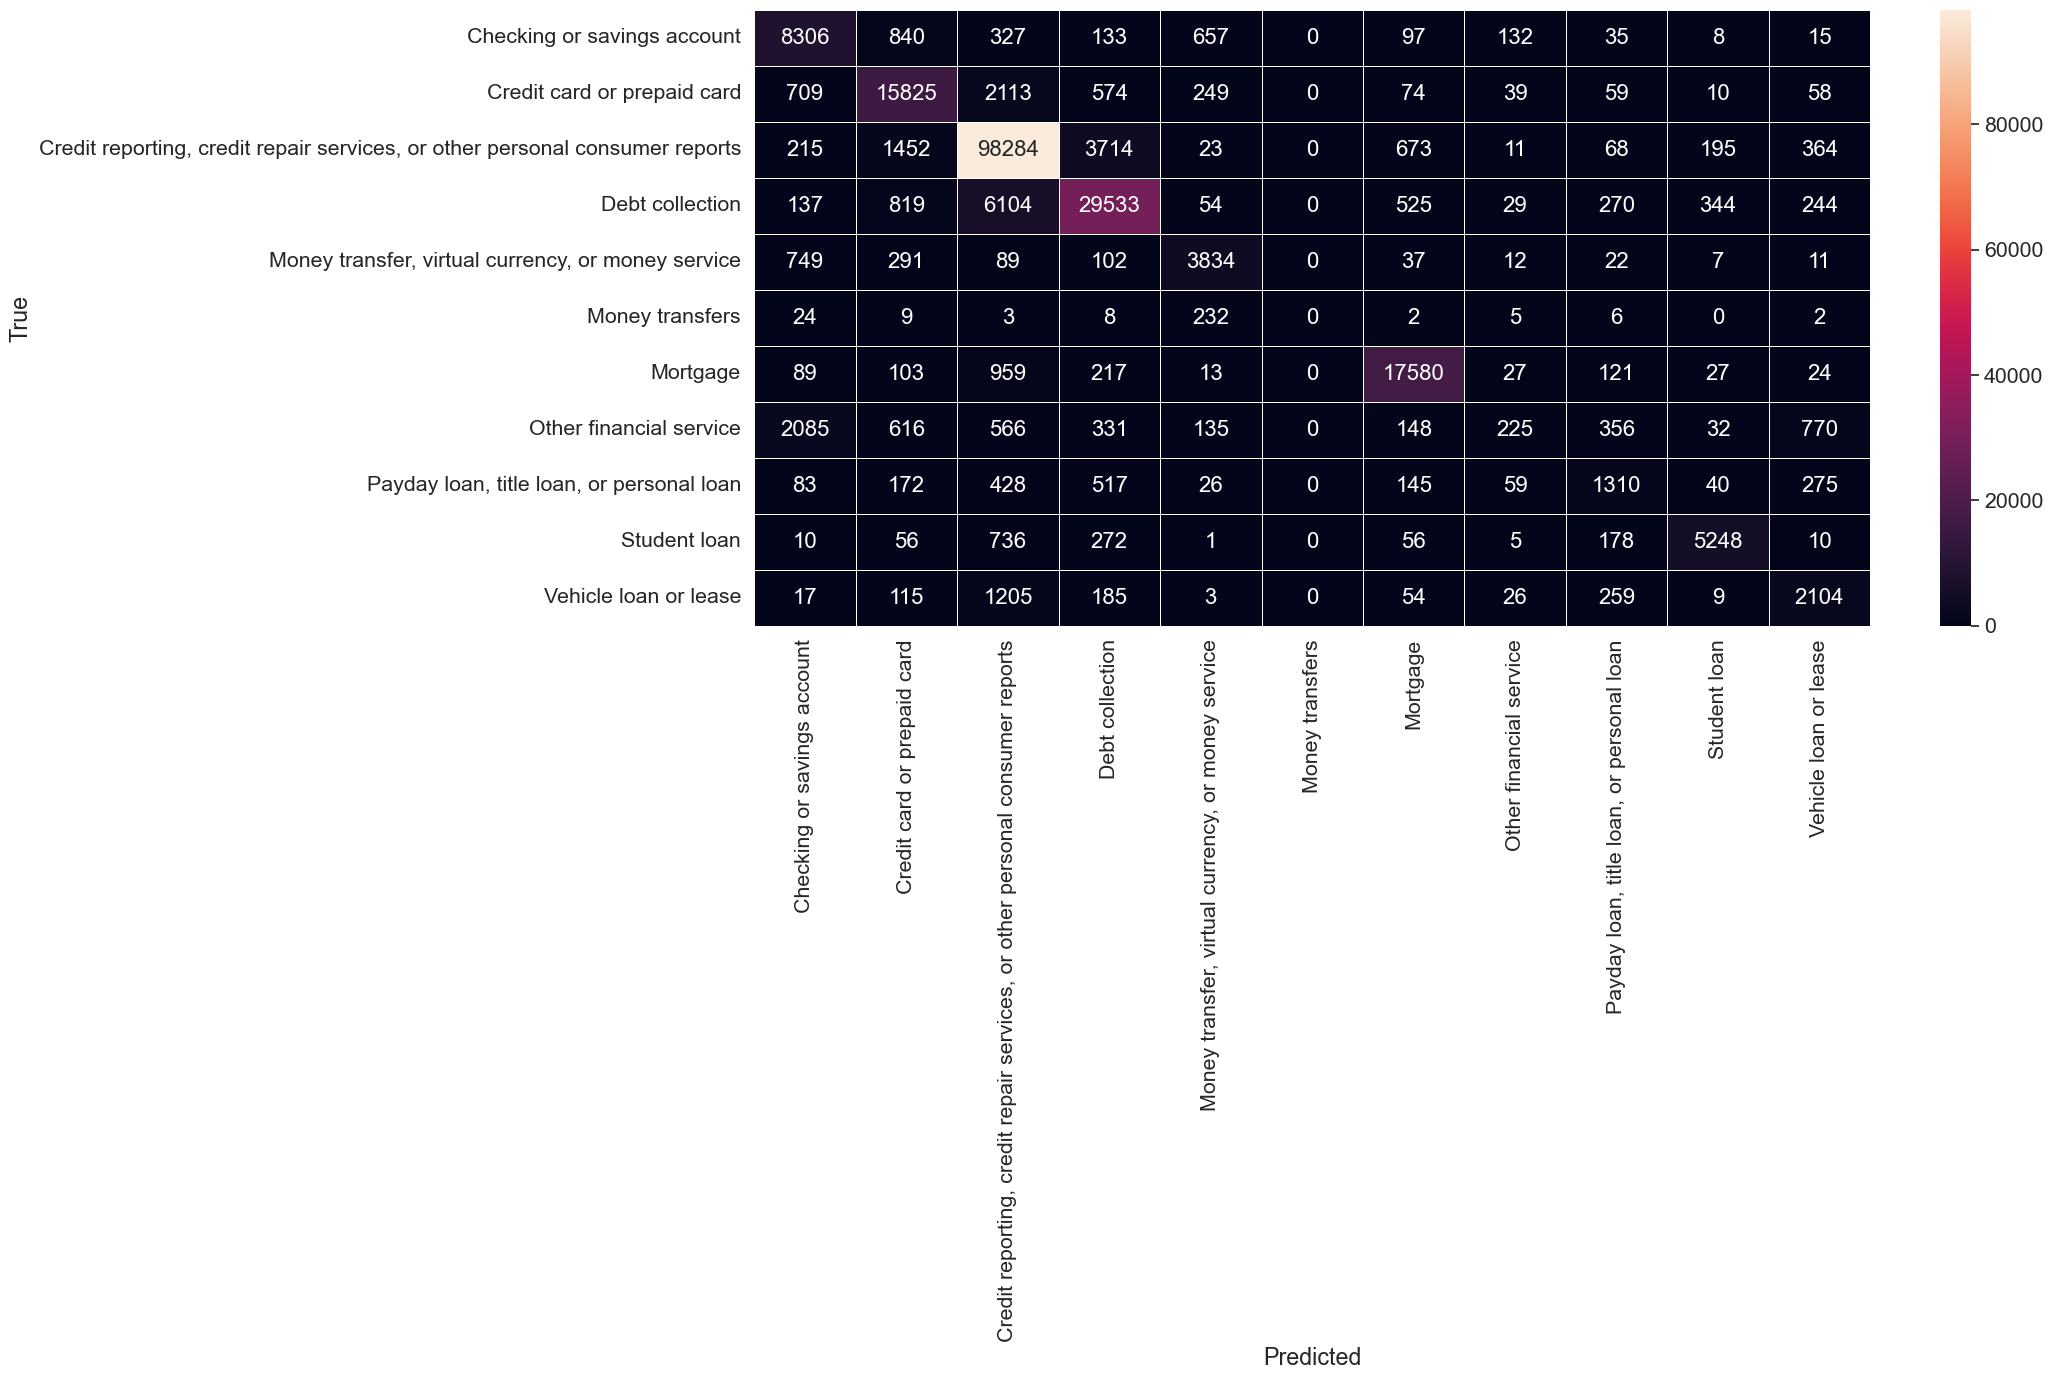

In [39]:
cm = confusion_matrix(expected_classes, predicted_classes)
plt.figure(figsize=(18,8))
sns.set(font_scale=1.4) 
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d',linewidths=0.5, xticklabels=labels, yticklabels=labels) 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()